# Mini-Lab: Bias, Variance, and Overfitting (Regression)

**Topic dataset:** Fertilizer rate → Crop yield

This dataset has an **inverted-U** pattern: adding fertilizer helps up to a point, but **too much fertilizer hurts yield**.
You'll fit models of different complexity and compare **bias, variance, and overfitting** using a train/test split.

## What you will do

1. Plot the data (scatter).
2. Fit a **linear regression** model (straight line).
3. Fit **polynomial regression** models (curves) of different degrees.
4. Compare **training vs test error** (MSE).
5. Use your results to explain **bias**, **variance**, and **overfitting**.

> Hint: Overfitting often shows up as **very low training error** but **worse test error**.

In [1]:
# Imports (run this cell)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
# Dataset (run this cell)
data = pd.DataFrame({
    "fertilizer_rate": [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120],
    "crop_yield":      [28, 42, 55, 47, 70, 63, 88, 74, 96, 79, 102, 85, 110]
})

data

,fertilizer_rate,crop_yield
0,0,28
1,10,42
2,20,55
3,30,47
4,40,70
5,50,63
6,60,88
7,70,74
8,80,96
9,90,79


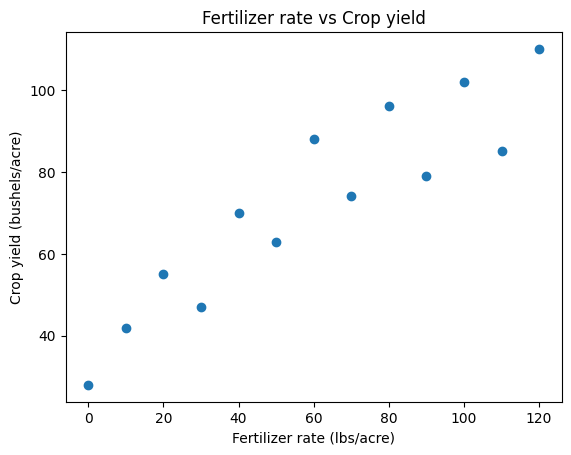

In [3]:
# 1) Visualize the data (run this cell)
plt.figure()
plt.scatter(data["fertilizer_rate"], data["crop_yield"])
plt.xlabel("Fertilizer rate (lbs/acre)")
plt.ylabel("Crop yield (bushels/acre)")
plt.title("Fertilizer rate vs Crop yield")
plt.show()

In [4]:
# 2) Train/test split (run this cell)
X = data[["fertilizer_rate"]].values
y = data["crop_yield"].values

# Fixed split so everyone gets the same result
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Train points:", len(X_train))
print("Test points:", len(X_test))

Train points: 9
Test points: 4


<p>One-sentence intuition on the degrees</p>

<p>Degree = how flexible the model is.<br>
Low degree = too stiff.<br>
High degree = too wiggly.<br>
The goal is just right.</p><p>

How it relates to Bias and Variance:</p><p>
Degree 1, Bias is High, Variance is Low, Typical Behavior is Model Underfitting (this is fitting a straight line to the data).</p><p>
Degree 2-3, Bias is Medium, Variance is Medium, Typical Behavior is Good (this is fitting a generalized line to the data).</p><p>
Degree 5-9, Bias is Low, Variance is High, Typical Behavior is Overfitting (this performs great on the training data and poorly on the testing or new data).</p><p>
We will be calculated MSE and R Squared, but not P value for these examples because P values measure confidence in coefficients, not prediction quality and we are interested in prediction quality for this exercise.</p>


### First Model: degree = 1, straight line simple linear regression

In [5]:
# Degree 1 = straight line
# This model is simple (straight line) but it cannot capture the curve!
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_train_pred_1 = lin_reg.predict(X_train)
y_test_pred_1 = lin_reg.predict(X_test)

print("Linear model")
print("Train MSE:", mean_squared_error(y_train, y_train_pred_1))
print("Test MSE:", mean_squared_error(y_test, y_test_pred_1))

Linear model
Train MSE: 48.24825662482567
Test MSE: 207.16088653910137


In [6]:
#Linear Model degree = 1 (straight line)
# Training R²
r2_train_lin = r2_score(y_train, y_train_pred_1)

# Test R²
r2_test_lin = r2_score(y_test, y_test_pred_1)

print("Linear model R²")
print("Train R²:", r2_train_lin)
print("Test R²:", r2_test_lin)


Linear model R²
Train R²: 0.9035463550369989
Test R²: 0.6964675655104742


### Second model, we will create new features to allow the linear regression to model the curve, linear regression doesn’t know how to curve unless we give it curved features

In [7]:
# Create polynomial features (this is what allows the curve)
poly = PolynomialFeatures(degree=8, include_bias=False)

# Create the train and test sets
X_train_poly = poly.fit_transform(X_train)
X_test_poly  = poly.transform(X_test)

# Fit linear regression on the polynomial features
model_deg8 = LinearRegression()
model_deg8.fit(X_train_poly, y_train)

# Predictions
y_train_pred = model_deg8.predict(X_train_poly)
y_test_pred  = model_deg8.predict(X_test_poly)

# Errors
print("Degree 8 model")
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))

Degree 8 model
Train MSE: 31.893580885651716
Test MSE: 9993.460187201243


In [8]:
#R squared for the degree 8 model
#note: A negative R squared means the model is worse than predicting the average every time.
r2_train_deg8 = r2_score(y_train, y_train_pred)
r2_test_deg8  = r2_score(y_test, y_test_pred)

print("Degree 8 model R²")
print("Train R²:", r2_train_deg8)
print("Test R²:", r2_test_deg8)

Degree 8 model R²
Train R²: 0.936241175484037
Test R²: -13.64243250871977


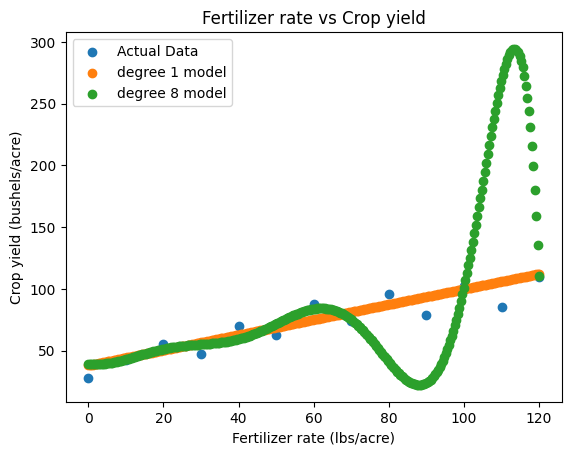

In [9]:
# created with help from ChatGPT to visualize the comparison
import numpy as np
import matplotlib.pyplot as plt
X_plot = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_plot_lin = lin_reg.predict(X_plot)
X_plot_poly = poly.transform(X_plot)
y_plot_deg8 = model_deg8.predict(X_plot_poly)

plt.figure()
plt.scatter(X, y, label="Actual Data")
plt.scatter(X_plot, y_plot_lin, label ="degree 1 model")
plt.scatter(X_plot, y_plot_deg8, label ="degree 8 model")
plt.xlabel("Fertilizer rate (lbs/acre)")
plt.ylabel("Crop yield (bushels/acre)")
plt.title("Fertilizer rate vs Crop yield")
plt.legend()
plt.show()

1. The first model (Degree 1) has the highest bias. There is a decently high MSE on the training data which means it is making inaccurate predictions. The model is too simple therefore it can not fit the curved pattern in the data.
2. The second model (Degree 8) has the highest variance. There is a very large difference in the MSE between the training and testing data. The model fits the training data well, but fits the testing data very poorly.
3. The first model is the best for predicting new farms because it has a lower MSE for testing, and the r squared value for the testing data is higher. The second model has a negative r squared value for the testing data, meaning that it is poorly fitted for the data and will give inaccurate predictions.
4. A model is overfitted if the model is to complicated and fits the data loosely. The second model has a low MSE for the training data meaning it fits the training data well, but has a very high MSE for the testing data meaning that it does not test well on new data.
5. Fertilizer with a rating near 80 is optimal because it has the highest crop yield. Anything above 80 begins to decrease crop yield.
6. The second model (Degree 8) has the higher r squared on the training data. This does not mean it is the better model because the r squared on the testing data for this model is negative, meaning that the model is overfitted for the data.

## Reflection questions (double click on the markdown cell and add your answers in markdown)

Answer in **1–3 sentences each**:

1. Which model has the **highest bias**? What did you observe that supports that?
2. Which model has the **highest variance**? What did you observe that supports that?
3. Which model seems **best for predicting new farms** (generalization)? Why?
4. Explain **overfitting** using your plot *and* the train/test MSE table.
5. Optional: What fertilizer rate looks “near-optimal” from the scatter plot?
6. Which model has the higher R squared on the training data, and why does that not mean it is the better model?

## What to submit

- First Save your notebook to your Github Portfolio (download .ipynb with File . . . Download, then Upload to your Repository)
- Then add a link in Github to your notebook
- Submit your Github Repository URL in the Backboard Assignment

OR

- submit your notebook saved as a PDF (File . . . Print . . . PDF from Colab)


Make sure your written answers are in the markdown in your notebook!